In [17]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import sklearn
from sklearn.decomposition import TruncatedSVD
import warnings
warnings.filterwarnings('ignore')

In [21]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [22]:
book_data = pd.read_csv("/content/drive/MyDrive/BookRecommendation/Books.csv")
book_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [23]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [24]:
book_data.shape

(271360, 8)

In [25]:
users_data= pd.read_csv('/content/drive/MyDrive/BookRecommendation/Users.csv')
users_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.000
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.000
4,5,"farnborough, hants, united kingdom",NaN


In [26]:
users_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [27]:
users_data.shape


(278858, 3)

In [28]:
ratings_data = pd.read_csv("/content/drive/MyDrive/BookRecommendation/Ratings.csv")
ratings_data.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [29]:
ratings_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [30]:
ratings_data.shape


(1149780, 3)

In [31]:
# droping the url
book_data.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis= 1, inplace= True)

In [32]:
# replacing '-' with '_' and features name in lower case
book_data.columns= book_data.columns.str.strip().str.lower().str.replace('-', '_')
users_data.columns= users_data.columns.str.strip().str.lower().str.replace('-', '_')
ratings_data.columns= ratings_data.columns.str.strip().str.lower().str.replace('-', '_')

In [33]:
pd.set_option('display.max_colwidth', -1)


In [34]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271360 non-null  object
 1   book_title           271360 non-null  object
 2   book_author          271359 non-null  object
 3   year_of_publication  271360 non-null  object
 4   publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [35]:
print(book_data.isnull().sum())


isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
dtype: int64


In [36]:
# nan values in particular column
book_data.loc[(book_data['book_author'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing


In [37]:
# nan values in particular column
book_data.loc[(book_data['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [38]:
# getting unique value from 'year_of_publication' feature
book_data['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [39]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title'
book_data[book_data['year_of_publication'] == 'DK Publishing Inc']

,isbn,book_title,book_author,year_of_publication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [40]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title'
book_data[book_data['year_of_publication'] == 'Gallimard']

,isbn,book_title,book_author,year_of_publication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [41]:
book_data.loc[221678]


isbn                   0789466953                                                                                                 
book_title             DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"
book_author            2000                                                                                                       
year_of_publication    DK Publishing Inc                                                                                          
publisher              http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg                                               
Name: 221678, dtype: object

In [42]:
book_data.loc[209538]


isbn                   078946697X                                                                                          
book_title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"
book_author            2000                                                                                                
year_of_publication    DK Publishing Inc                                                                                   
publisher              http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg                                        
Name: 209538, dtype: object

In [43]:
book_data.loc[220731]


isbn                   2070426769                                                              
book_title             Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"
book_author            2003                                                                    
year_of_publication    Gallimard                                                               
publisher              http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg            
Name: 220731, dtype: object

In [44]:
# function to fix mismatch data in feature 'book_title', 'book_author', ' year_of_publication', 'publisher'
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [45]:
replace_df_value(book_data, 209538, 'book_title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(book_data, 209538, 'book_author', 'Michael Teitelbaum')
replace_df_value(book_data, 209538, 'year_of_publication', 2000)
replace_df_value(book_data, 209538, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data, 221678, 'book_title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(book_data, 221678, 'book_author', 'James Buckley')
replace_df_value(book_data, 221678, 'year_of_publication', 2000)
replace_df_value(book_data, 221678, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data, 220731,'book_title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(book_data, 220731, 'book_author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(book_data, 220731, 'year_of_publication', 2003)
replace_df_value(book_data, 220731, 'publisher', 'Gallimard')

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [46]:
book_data.loc[209538]

isbn                   078946697X                                                                    
book_title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)
book_author            Michael Teitelbaum                                                            
year_of_publication    2000                                                                          
publisher              DK Publishing Inc                                                             
Name: 209538, dtype: object

In [47]:
book_data.loc[221678]

isbn                   0789466953                                                                                
book_title             DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)
book_author            James Buckley                                                                             
year_of_publication    2000                                                                                      
publisher              DK Publishing Inc                                                                         
Name: 221678, dtype: object

In [48]:
book_data.loc[220731]

isbn                   2070426769                           
book_title             Peuple du ciel, suivi de 'Les Bergers
book_author            Jean-Marie Gustave Le ClÃ?Â©zio      
year_of_publication    2003                                 
publisher              Gallimard                            
Name: 220731, dtype: object

In [49]:
book_data.loc[(book_data['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [50]:
# replacing 'Nan' with 'No Mention'
book_data.loc[(book_data['isbn'] == '193169656X'),'publisher'] = 'No Mention'
book_data.loc[(book_data['isbn'] == '1931696993'),'publisher'] = 'No Mention'

In [51]:
df = pd.DataFrame(book_data)
cols = [4]
df = df[df.columns[cols]]

In [52]:
pd.set_option('display.max_columns', None)
df.head(5)

,publisher
0,Oxford University Press
1,HarperFlamingo Canada
2,HarperPerennial
3,Farrar Straus Giroux
4,W. W. Norton &amp; Company


In [53]:
book_data[book_data['publisher'] == 'No Mention']


,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,No Mention
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,No Mention


In [54]:
# users_data size
print(users_data.shape)

(278858, 3)


In [55]:
# unique value in age
users_data['age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [56]:
# replacing nan with average of 'age'
users_data['age'].fillna((users_data['age'].mean()), inplace=True)
users_data['age'].unique()

array([ 34.7514337,  18.       ,  17.       ,  61.       ,  26.       ,
        14.       ,  25.       ,  19.       ,  46.       ,  55.       ,
        32.       ,  24.       ,  20.       ,  34.       ,  23.       ,
        51.       ,  31.       ,  21.       ,  44.       ,  30.       ,
        57.       ,  43.       ,  37.       ,  41.       ,  54.       ,
        42.       ,  50.       ,  39.       ,  53.       ,  47.       ,
        36.       ,  28.       ,  35.       ,  13.       ,  58.       ,
        49.       ,  38.       ,  45.       ,  62.       ,  63.       ,
        27.       ,  33.       ,  29.       ,  66.       ,  40.       ,
        15.       ,  60.       ,   0.       ,  79.       ,  22.       ,
        16.       ,  65.       ,  59.       ,  48.       ,  72.       ,
        56.       ,  67.       ,   1.       ,  80.       ,  52.       ,
        69.       ,  71.       ,  73.       ,  78.       ,   9.       ,
        64.       , 103.       , 104.       ,  12.       ,  74. 

In [57]:
# retrieving age data between 5 to 90
users_data.loc[(users_data['age'] > 90) | (users_data['age'] < 5)] = np.nan
users_data['age'].fillna((users_data['age'].mean()), inplace=True)
users_data['age'].unique()

array([34.7514337 , 18.        , 17.        , 61.        , 26.        ,
       14.        , 25.        , 19.        , 46.        , 55.        ,
       32.        , 24.        , 20.        , 34.        , 23.        ,
       51.        , 31.        , 21.        , 44.        , 30.        ,
       57.        , 43.        , 37.        , 41.        , 54.        ,
       42.        , 50.        , 39.        , 53.        , 47.        ,
       36.        , 28.        , 35.        , 13.        , 58.        ,
       49.        , 38.        , 45.        , 62.        , 63.        ,
       27.        , 33.        , 29.        , 66.        , 40.        ,
       15.        , 60.        , 34.73485224, 79.        , 22.        ,
       16.        , 65.        , 59.        , 48.        , 72.        ,
       56.        , 67.        , 80.        , 52.        , 69.        ,
       71.        , 73.        , 78.        ,  9.        , 64.        ,
       12.        , 74.        , 75.        , 76.        , 83.  

In [58]:
ratings_data.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [59]:
# finding unique ISBNs from rating and book dataset
unique_ratings = ratings_data[ratings_data.isbn.isin(book_data.isbn)]
unique_ratings

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [60]:
print(ratings_data.shape)
print(unique_ratings.shape)

(1149780, 3)
(1031136, 3)


In [61]:
# unique ratings from 'book_rating' feature
unique_ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2])

Text(0.5, 1.0, 'Top 20 author with number of books')

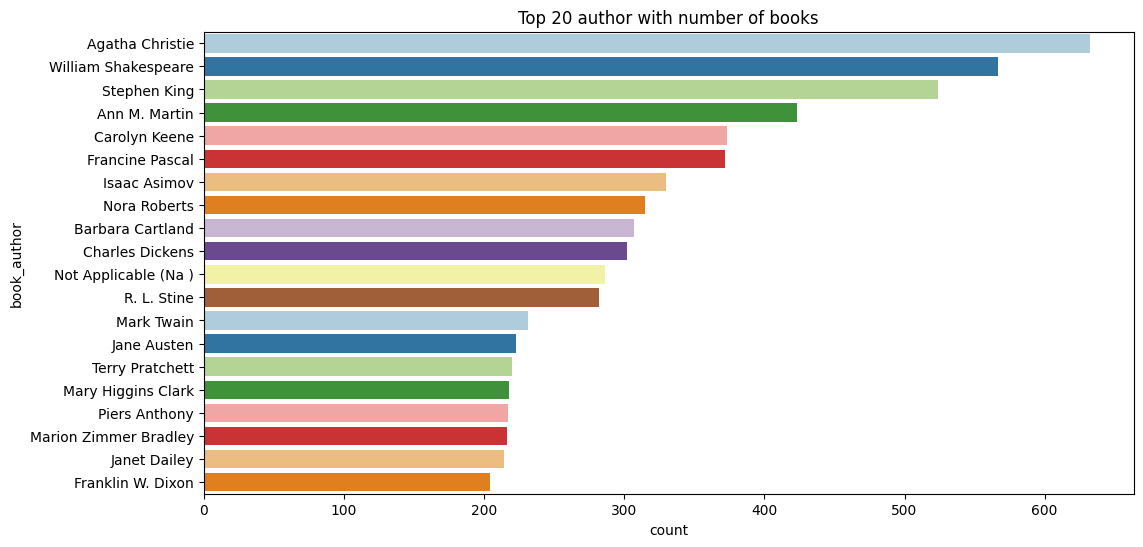

In [64]:
#Which are the top Author with number of books ?
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(y="book_author",palette = 'Paired', data=book_data,order=book_data['book_author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")

Text(0.5, 1.0, 'Top 20 Publishers with number of books published')

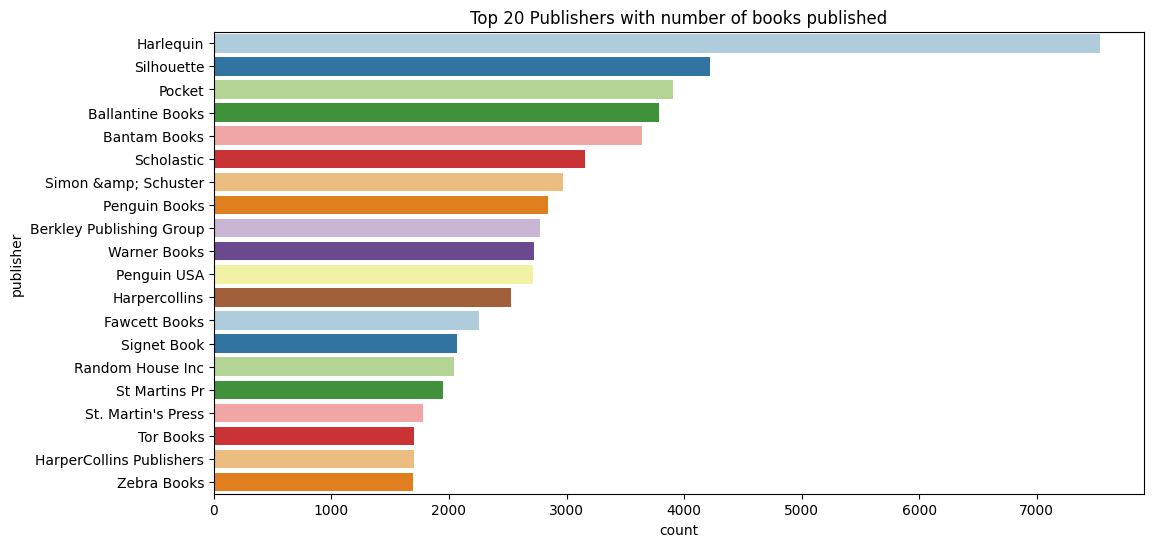

In [65]:
#Which are top publishers with published books ?

plt.figure(figsize=(12,6))
sns.countplot(y="publisher",palette = 'Paired', data=book_data,order=book_data['publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with number of books published")

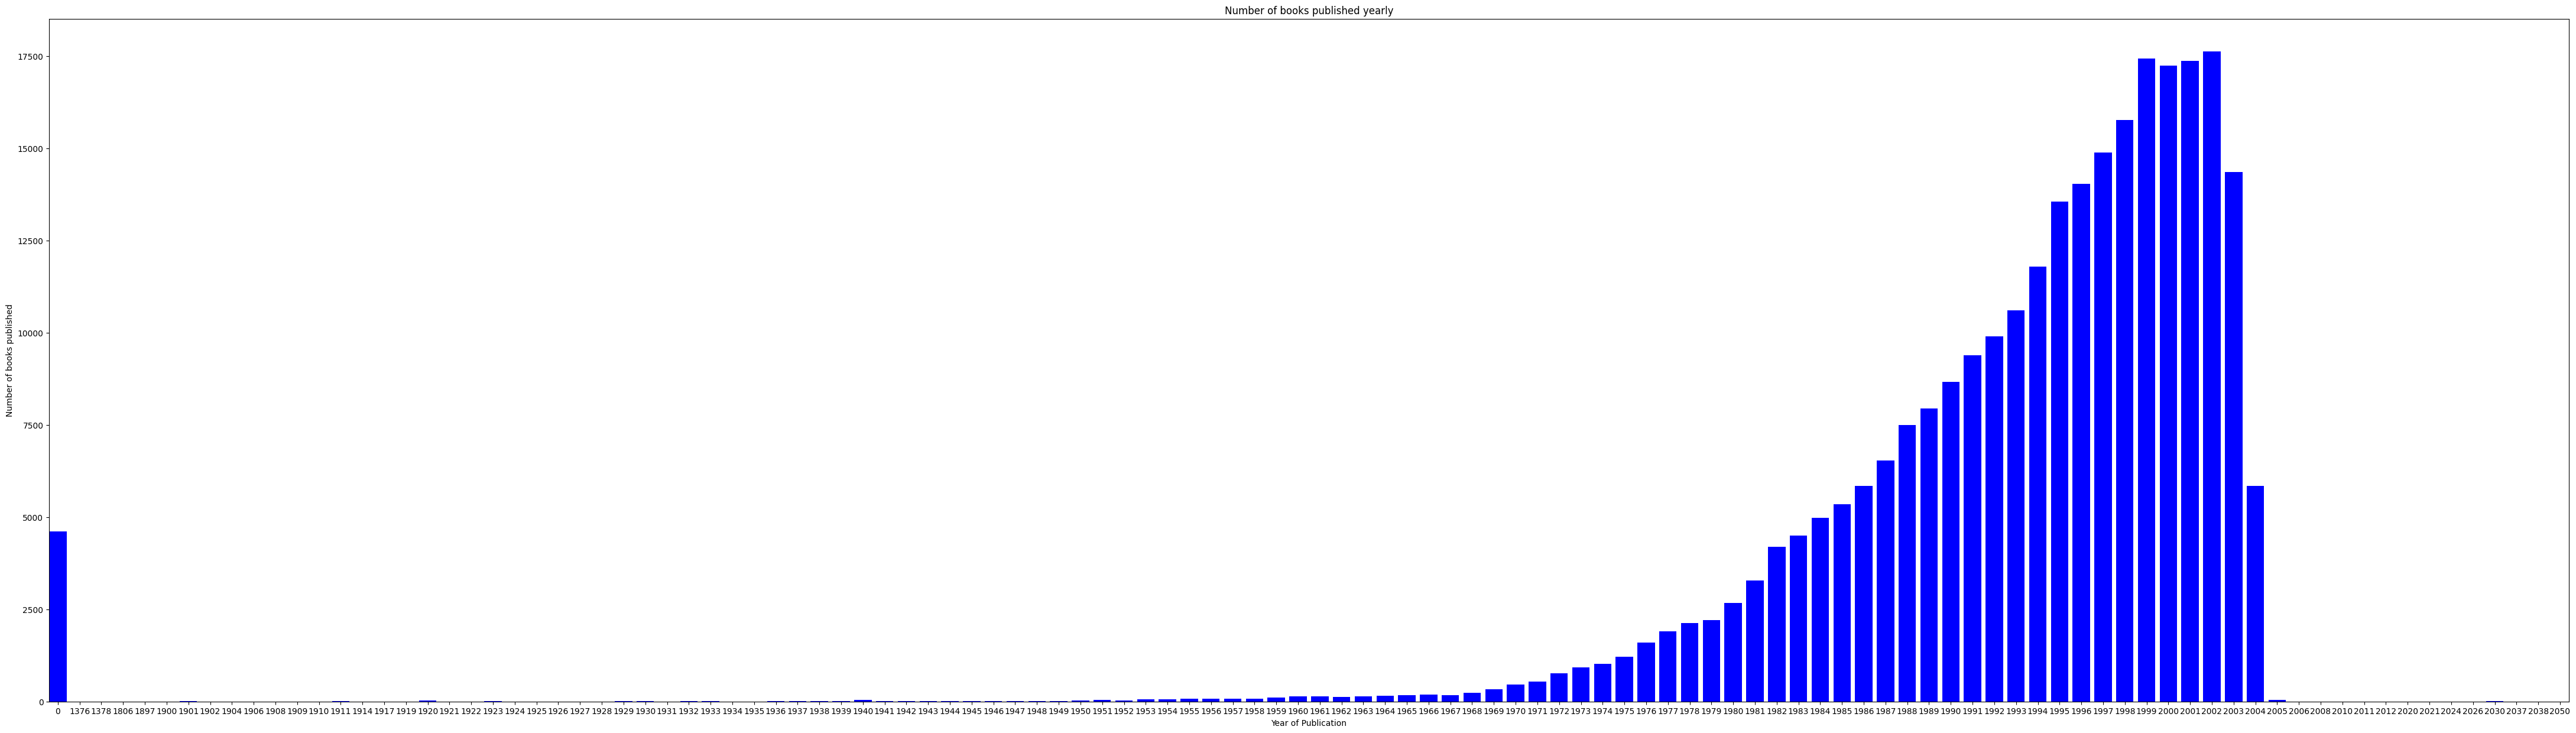

In [66]:
#Number of Books published in yearly.

publications = {}
for year in book_data['year_of_publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

In [67]:
book_data.year_of_publication = pd.to_numeric(book_data.year_of_publication, errors='coerce')

# Checking for 0's or NaNs in Year of Publication
zero_year = book_data[book_data.year_of_publication == 0].year_of_publication.count()
nan_year = book_data.year_of_publication.isnull().sum()

print(f'There are {zero_year} entries as \'0\', and {nan_year} NaN entries in the Year of Publication field')

# Replace all years of zero with NaN
book_data.year_of_publication.replace(0, np.nan, inplace=True)

There are 4618 entries as '0', and 0 NaN entries in the Year of Publication field


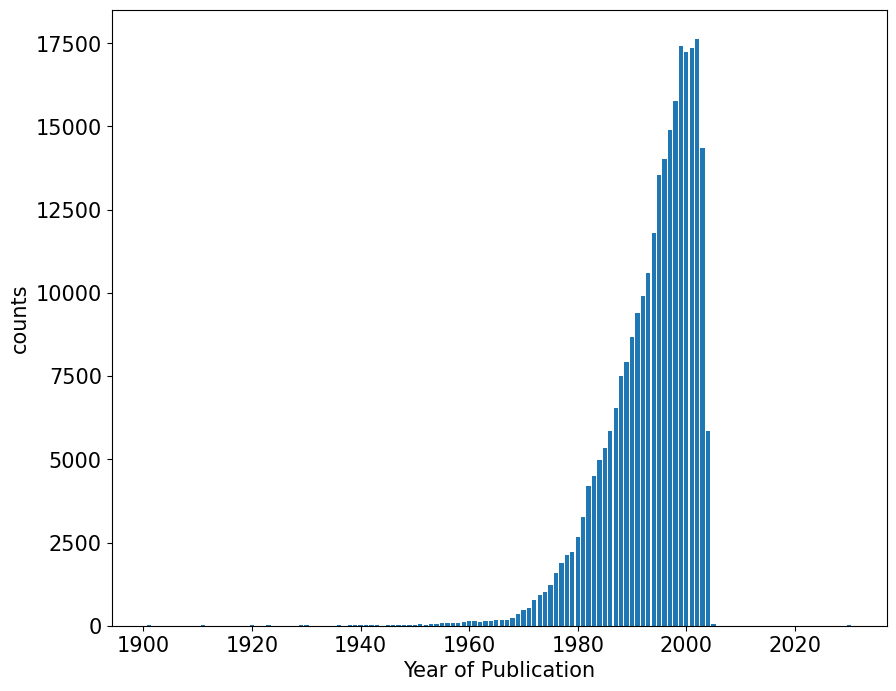

In [68]:
year = book_data.year_of_publication.value_counts().sort_index()
year = year.where(year>5)
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15})
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

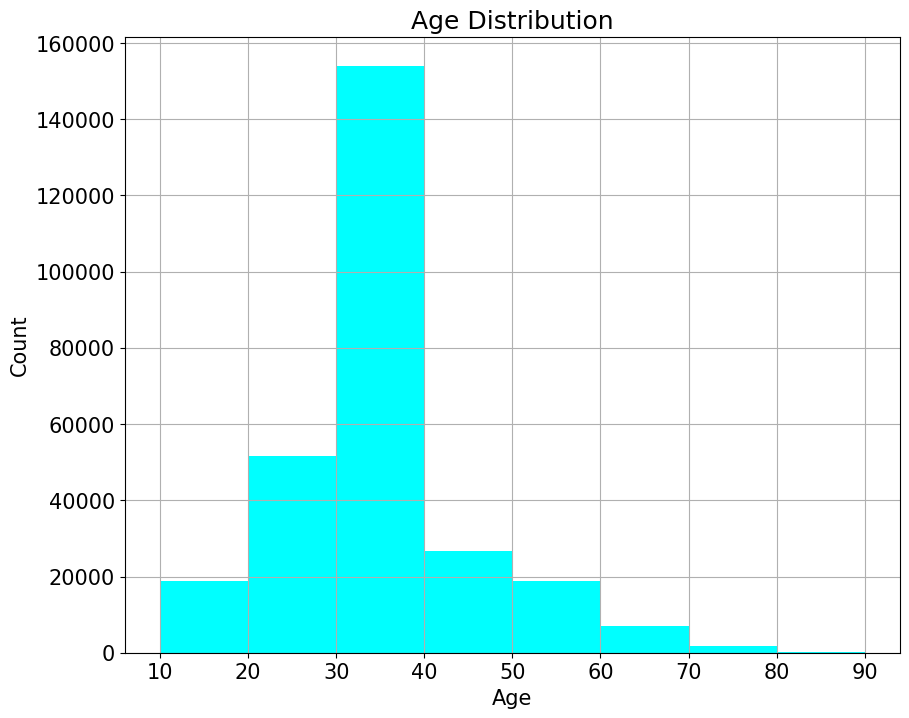

In [69]:
#Age distributions of users_data

plt.figure(figsize=(10,8))
users_data.age.hist(bins=[10*i for i in range(1, 10)], color = 'cyan')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Top 20 books as per number of ratings')

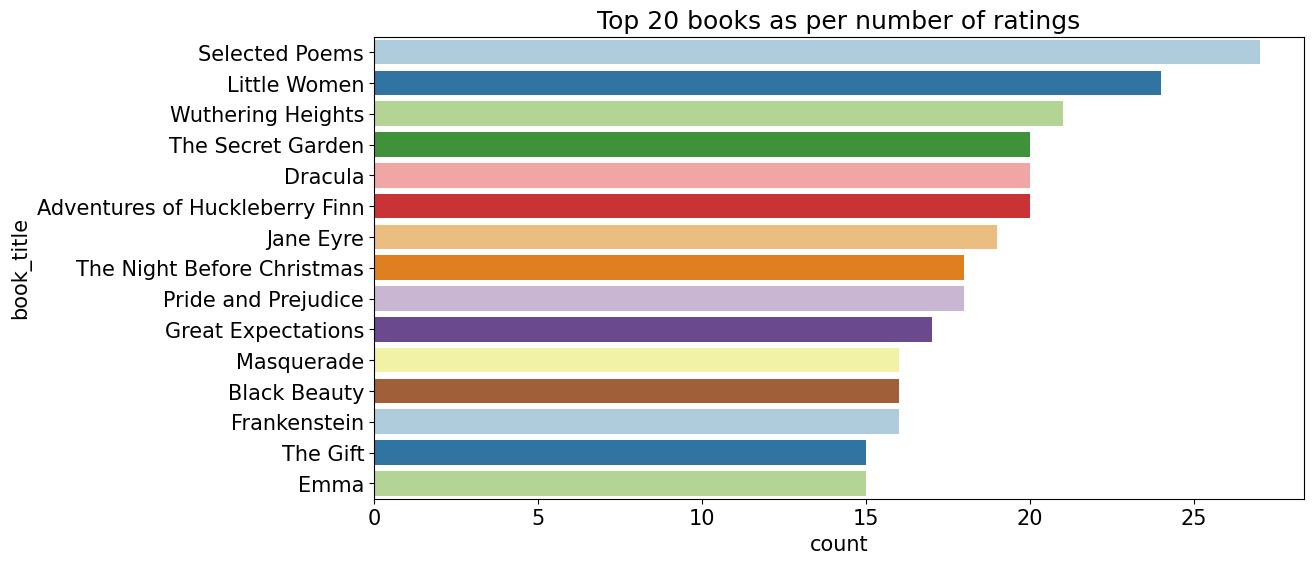

In [70]:
#What are top 20 books as per number of ratings ?

plt.figure(figsize=(12,6))
sns.countplot(y="book_title",palette = 'Paired',data= book_data, order=book_data['book_title'].value_counts().index[0:15])
plt.title("Top 20 books as per number of ratings")

<Axes: xlabel='book_rating', ylabel='count'>

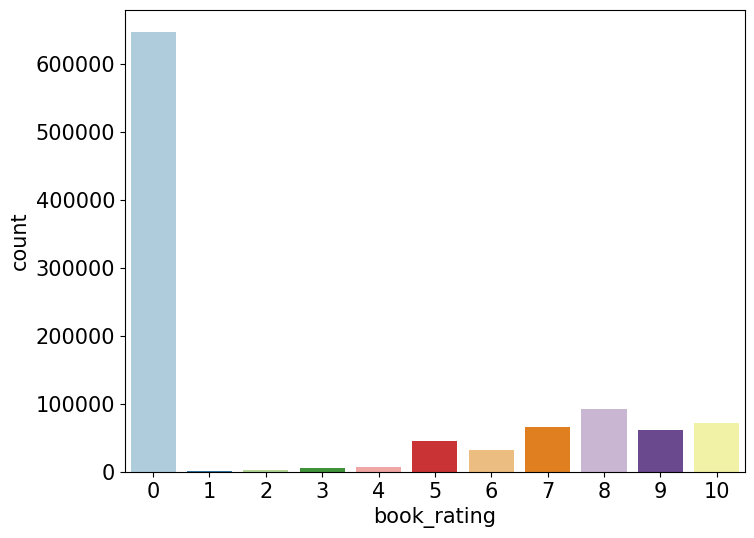

In [71]:
plt.figure(figsize=(8,6))
sns.countplot(x="book_rating",palette = 'Paired',data= unique_ratings)

Text(0.5, 1.0, 'Explicit Ratings')

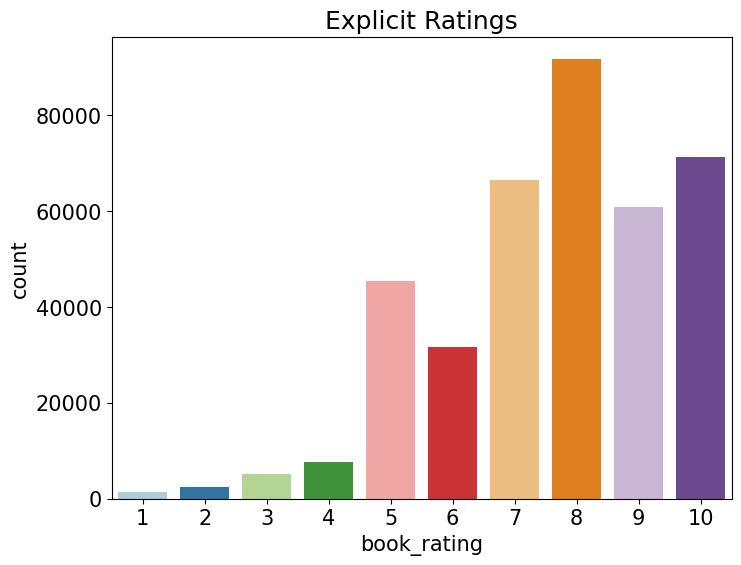

In [72]:
# Explicit Ratings
plt.figure(figsize=(8,6))
rate_data = unique_ratings[unique_ratings['book_rating'] != 0]
sns.countplot(x="book_rating",palette = 'Paired',data=rate_data)
plt.title("Explicit Ratings")

Recommendation System

In [73]:
ratings_explicit= unique_ratings[unique_ratings['book_rating'] != 0]   # explicit ratings represented by 1–10
ratings_implicit= unique_ratings[unique_ratings['book_rating'] == 0]   # implicit ratings represented by 0
ratings_explicit.head()

,user_id,isbn,book_rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [74]:
print(unique_ratings.shape)
print(ratings_explicit.shape)


# Merging book_data dataset and ratings_explicit
new_book_df= pd.merge(book_data, ratings_explicit, on='isbn')
new_book_df.head()

(1031136, 3)
(383842, 3)


,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001.000,HarperFlamingo Canada,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,2001.000,HarperFlamingo Canada,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,2001.000,HarperFlamingo Canada,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001.000,HarperFlamingo Canada,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001.000,HarperFlamingo Canada,123629,9


In [75]:
print(new_book_df.shape)

new_book_df['book_title'].count()

new_book_df['book_title'].nunique()


(383842, 7)


135567

Top 10 recommendation books

In [76]:

# top ten books as per book ratings and recommendation
top_ten_books= pd.DataFrame(new_book_df.groupby('book_title')['book_rating'].count()
                         .sort_values(ascending=False).head(10))
print('The top ten books as per ratings : ')
top_ten_books

The top ten books as per ratings : 


,book_rating
book_title,
The Lovely Bones: A Novel,707
Wild Animus,581
The Da Vinci Code,494
The Secret Life of Bees,406
The Nanny Diaries: A Novel,393
The Red Tent (Bestselling Backlist),383
Bridget Jones's Diary,377
A Painted House,366
Life of Pi,336


# Memory-Based Collaborative Filtering

In [81]:
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(new_book_df, test_size=0.20)
print(f'Training set lengths: {len(train_data)}')
print(f'Testing set lengths: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

Training set lengths: 307073
Testing set lengths: 76769
Test set is 20% of the full dataset.


In [82]:
# Get int mapping for user_id in train dataset
u_unique_train = train_data.user_id.unique()
train_data_user2idx = {o:i for i, o in enumerate(u_unique_train)}

# Get int mapping for isbn in train dataset
i_unique_train = train_data.isbn.unique()
train_data_book2idx = {o:i for i, o in enumerate(i_unique_train)}

# Get int mapping for user_id in test dataset
u_unique_test = test_data.user_id.unique()
test_data_user2idx = {o:i for i, o in enumerate(u_unique_test)}

# Get int mapping for isbn in test dataset
i_unique_test = test_data.isbn.unique()
test_data_book2idx = {o:i for i, o in enumerate(i_unique_test)}

# training set
train_data['u_unique'] = train_data['user_id'].map(train_data_user2idx)
train_data['i_unique'] = train_data['isbn'].map(train_data_book2idx)

# testing set
test_data['u_unique'] = test_data['user_id'].map(test_data_user2idx)
test_data['i_unique'] = test_data['isbn'].map(test_data_book2idx)

# Convert back to three feature of dataframe
train_data = train_data[['u_unique', 'i_unique', 'book_rating']]
test_data = test_data[['u_unique', 'i_unique', 'book_rating']]

train_data.sample(5)

,u_unique,i_unique,book_rating
4451,1322,10515,5
280434,50199,66426,8
35942,57746,4785,8
52523,59,13152,9
186360,1059,4135,9


In [83]:
test_data.sample(5)


,u_unique,i_unique,book_rating
262104,5752,19778,10
179508,204,44408,5
249343,18078,30546,7
228141,23846,42506,10
177837,4763,14043,7


In [84]:
#  create an empty matrix of users books and then add the appropriate values to the matrix by extracting them from the dataset
n_users = train_data['u_unique'].nunique()
n_books = train_data['i_unique'].nunique()

train_matrix = np.zeros((n_users, n_books))

for entry in train_data.itertuples():
    train_matrix[entry[1]-1, entry[2]-1] = entry[3]    # entry[1] is the user-id, entry[2] is the book-isbn and -1 is to counter 0-based indexing
train_matrix.shape

(59886, 128900)

In [85]:
n_users = test_data['u_unique'].nunique()
n_books = test_data['i_unique'].nunique()

test_matrix = np.zeros((n_users, n_books))

for entry in test_data.itertuples():
    test_matrix[entry[1]-1, entry[2]-1] = entry[3]
test_matrix.shape

(25854, 47085)

# Cosine Similarity Based Recommendation System

In [86]:
# To make item-item similarity we need to take the transpose of the matrix
train_matrix_small = train_matrix[:5000, :5000]
test_matrix_small = test_matrix[:5000, :5000]

from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_matrix_small, metric='cosine')
item_similarity = pairwise_distances(train_matrix_small.T, metric='cosine')


# function to predict the similarity :
def predict_books(ratings, similarity, type='user'): # default type is 'user'
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)

        # Use np.newaxis so that mean_user_rating has the same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred


item_prediction = predict_books(train_matrix_small, item_similarity, type='item')
user_prediction = predict_books(train_matrix_small, user_similarity, type='user')

In [87]:
# Evaluation metric by mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, test_matrix):
    prediction = prediction[test_matrix.nonzero()].flatten()
    test_matrix = test_matrix[test_matrix.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, test_matrix))

print(f'Item-based CF RMSE: {rmse(item_prediction, test_matrix_small)}')
print(f'User-based CF RMSE: {rmse(user_prediction, test_matrix_small)}')

Item-based CF RMSE: 7.952366827767397
User-based CF RMSE: 7.951357251120061


# Model based approach by SVD model.

In [90]:
from surprise import Reader, Dataset
# Creating a 'Reader' object to set the limit of the ratings
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings_explicit, reader)
from surprise import SVD, model_selection, accuracy
model = SVD()

# Train on books dataset
%time model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6357  1.6375  1.6316  1.6413  1.6367  1.6366  0.0031  
Fit time          18.35   14.08   9.50    9.42    9.46    12.16   3.57    
Test time         1.64    0.53    0.89    0.82    0.60    0.90    0.39    
CPU times: user 1min 4s, sys: 581 ms, total: 1min 4s
Wall time: 1min 16s


{'test_rmse': array([1.63569769, 1.63749995, 1.63156718, 1.64133625, 1.63668426]),
 'fit_time': (18.3450665473938,
  14.084980249404907,
  9.502997398376465,
  9.416495323181152,
  9.457128763198853),
 'test_time': (1.6362090110778809,
  0.5312390327453613,
  0.8908290863037109,
  0.823477029800415,
  0.5970382690429688)}

In [91]:
# train and test split
trainset, testset = model_selection.train_test_split(data, test_size=0.2)

# SVD model
model = SVD()
model.fit(trainset)

In [92]:
# displaying RMSE score
predictions = model.test(testset)
print(f"The accuracy is {accuracy.rmse(predictions)}")

RMSE: 1.6282
The accuracy is 1.6281544975714057


In [93]:
# to test result let's take an user-id and item-id to test our model.
uid = 276744
iid = '038550120X'
pred = model.predict(uid, iid, verbose=True)

user: 276744     item: 038550120X r_ui = None   est = 7.47   {'was_impossible': False}


In [94]:
# display estimated rating and real rating
print(f'The estimated rating for the book with ISBN code {pred.iid} from user #{pred.uid} is {pred.est:.2f}.\n')
actual_rtg= ratings_explicit[(ratings_explicit.user_id==pred.uid) &
                             (ratings_explicit.isbn==pred.iid)].book_rating.values[0]
print(f'The real rating given for this was {actual_rtg:.2f}.')

The estimated rating for the book with ISBN code 038550120X from user #276744 is 7.47.

The real rating given for this was 7.00.


In [95]:
# The following function was adapted from the surprise docs
# and can be used to get the top book recommendations for each user.
from collections import defaultdict

def get_top_n(predictions, n=10):

    # First map the predictions to each user
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n
# prediciton on teset and getting top predictions
pred = model.test(testset)
top_n = get_top_n(pred)
pred_testset_df = pd.DataFrame(pred)
pred_testset_df

,uid,iid,r_ui,est,details
0,40889,0380730359,6.000,8.412,{'was_impossible': False}
1,224003,0142002267,8.000,7.756,{'was_impossible': False}
2,187918,0060976845,7.000,7.320,{'was_impossible': False}
3,59172,0453007023,5.000,9.087,{'was_impossible': False}
4,189835,0452253802,5.000,5.141,{'was_impossible': False}
...,...,...,...,...,...
76764,103149,0425143597,10.000,7.778,{'was_impossible': False}
76765,138239,0679409874,9.000,8.382,{'was_impossible': False}
76766,151806,1551660105,4.000,7.529,{'was_impossible': False}
76767,42948,0877934800,5.000,7.878,{'was_impossible': False}


# Retrieving full book titles from full 'books_users_ratings' dataframe

In [96]:
def get_reading_list(userid):

    reading_list = defaultdict(list)
    top_n = get_top_n(pred, n=10)
    for n in top_n[userid]:
        book, rating = n
        title = new_book_df.loc[new_book_df.isbn==book].book_title.unique()[0]
        reading_list[title] = rating
    return reading_list
#take a random look at user_id
example_reading_list = get_reading_list(userid=116866)
for book, rating in example_reading_list.items():
    print(f'{book}: {rating}')

The No. 1 Ladies' Detective Agency (Today Show Book Club #8): 8.411907727210384
Teach Yourself Web Publishing With Html in a Week (Teach Yourself (Teach Yourself)): 7.830566373637683
The Dinosaur Project: The Story of the Greatest Dinosaur Hunt Ever Mounted: 7.830566373637683
The Biosphere.: 7.830566373637683
Elementary Statistics: 7.830566373637683
In the Suicide Mountains: 7.830566373637683
Lucy: The Beginnings of Humankind: 7.830566373637683
Applied Linear Statistical Models: Regression, Analysis of Variance, and Experimental Designs: 7.830566373637683
Introduction to ATM Design and Performance: With Applications Analysis Software: 7.830566373637683
Does God Play Dice: The Mathematics of Chaos: 7.830566373637683


As we can observe above we've got top recommendation of books and ratings with respective to it.